In [21]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import (Basic_info_func, Remove_outliers_with_lof, Select_k_best_features, Adjusted_r2_score,
                       Evaluation_results)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.activations import tanh
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import xgboost as xgb
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, RandomizedSearchCV
from tqdm import tqdm
import xgboost as xgb
import time

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Path = /OneDrive/Desktop/MS-AAi/Course_500_Probability/Project_AAI500-A1 

In [22]:
#loading dataset 
train_df = pd.read_csv('./Data/train_df.csv')
test_df = pd.read_csv('./Data/test_df.csv')

X_train = train_df.drop('critical_temp', axis = 1)
y_train = train_df['critical_temp']

X_test = test_df.drop('critical_temp', axis = 1)
y_test = test_df['critical_temp']

In [23]:
new_train_X, new_train_y  = Remove_outliers_with_lof(X_train, y_train, contamination = 0.01)

Shape before outlier removal:
(19136, 82)

Shape after outlier removal:
(18944, 82)


### Features Selection

In the data analysis part we observed that our entire data has many highly colinear features that causes multi colinearity. 


In [25]:
# Assuming train_X and test_X are your training and test datasets
pca = PCA(n_components=30) 
# 1. Fit scaler (or PCA) on training data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(new_train_X)
train_X_pca = pca.fit_transform(train_X_scaled)

# 2. Transform both training and test data using the fitted scaler (or PCA)
test_X_scaled = scaler.transform(X_test)
test_X_pca = pca.transform(test_X_scaled)

print(f'Variance explained by selected features: ', np.sum(pca.explained_variance_ratio_))

Variance explained by selected features:  0.9893110828838337


### Simple Linear regression

Linear Regression Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 22.05307
Training MAE: 17.39417
Training R2 score: 0.58587
Training Adjusted R2 score: 0.58563

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 22.59032
Testing MAE: 17.98228
Testing R2 score: 0.56341
Testing Adjusted R2 score: 0.56204


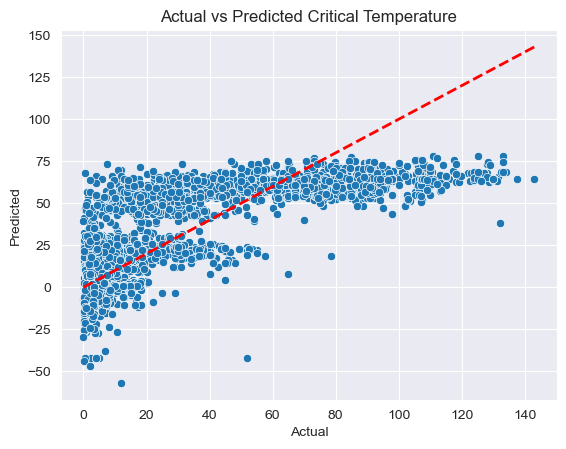

In [6]:
# Step 1: Initialize the linear regression model
simple_linear_regression = LinearRegression()

# Step 2: Fit the model on the scaled training data
simple_linear_regression.fit(train_X_pca, new_train_y)

# Step 3: Predict on the training set
train_preds = simple_linear_regression.predict(train_X_pca)

# Testing results
print('Linear Regression Results')
num_features = train_X_pca.shape[1]
train_metrics = Evaluation_results(new_train_y, train_preds, objective = 'train', num_features  = num_features)
train_metrics

# # Testing Results
test_preds = simple_linear_regression.predict(test_X_pca)
test_metrics = Evaluation_results(y_test, test_preds, objective = 'test', num_features  = num_features)
test_metrics


sns.scatterplot(x= y_test, y = test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

### Random Forest

Random Forest Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 13.56788
Training MAE: 8.82284
Training R2 score: 0.84273
Training Adjusted R2 score: 0.84268
None
Random Forest Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 14.44597
Testing MAE: 9.51644
Testing R2 score: 0.82147
Testing Adjusted R2 score: 0.82119
None


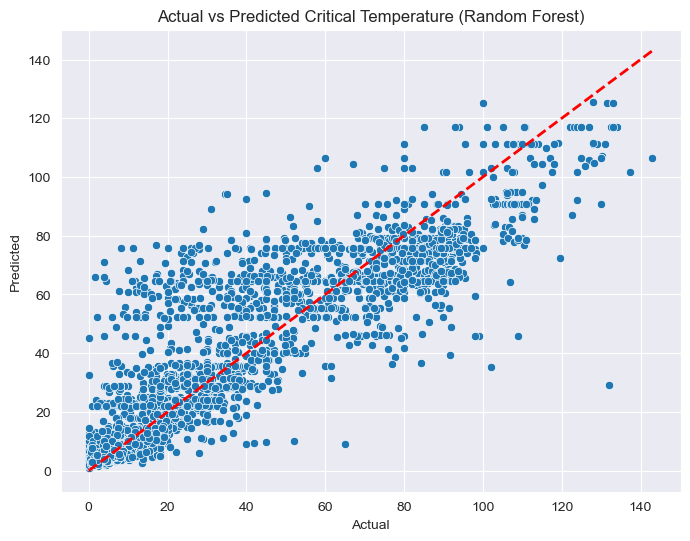

In [99]:
# Step 1: Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, 
                                 max_depth=10,
                                 random_state=42)

# Step 2: Fit the model on the scaled training data
rf_model.fit(train_X_pca, new_train_y)

# Step 3: Predict on the training set
rf_train_preds = rf_model.predict(train_X_pca)

# Training results
print('Random Forest Results')
num_features = train_X_pca.shape[1]
train_metrics = Evaluation_results(new_train_y, rf_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
rf_test_preds = rf_model.predict(test_X_pca)

# Testing results
print('Random Forest Results on Test Set')
num_features = test_X_pca.shape[1]
test_metrics = Evaluation_results(y_test, rf_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Random Forest)')
plt.show()


### Gradient Boosting

Gradient Boosting Machine Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 4.21923
Training MAE: 1.45976
Training R2 score: 0.98484
Training Adjusted R2 score: 0.98482
None
Gradient Boosting Machine Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 10.91058
Testing MAE: 5.76207
Testing R2 score: 0.89522
Testing Adjusted R2 score: 0.89372
None


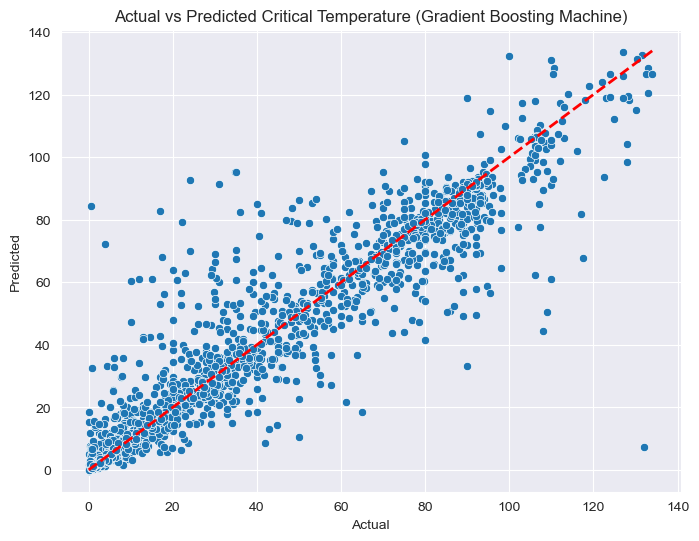

In [26]:
# Step 1: Initialize the GBM Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=1000,
                                      learning_rate=0.05,
                                      max_depth=12,
                                      random_state=42)

# Step 2: Fit the model on the scaled training data
gbm_model.fit(train_X_pca, new_train_y)

# Step 3: Predict on the training set
gbm_train_preds = gbm_model.predict(train_X_pca)

# Training results
print('Gradient Boosting Machine Results')
num_features = train_X_pca.shape[1]
train_metrics = Evaluation_results(new_train_y, gbm_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
gbm_test_preds = gbm_model.predict(test_X_pca)

# Testing results
print('Gradient Boosting Machine Results on Test Set')
num_features = test_X_pca.shape[1]
test_metrics = Evaluation_results(y_test, gbm_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gbm_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Gradient Boosting Machine)')
plt.show()


### XGBoost

XGBoost Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 4.76423
Training MAE: 2.38021
Training R2 score: 0.98067
Training Adjusted R2 score: 0.98064

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 10.32475
Testing MAE: 5.60980
Testing R2 score: 0.90617
Testing Adjusted R2 score: 0.90483


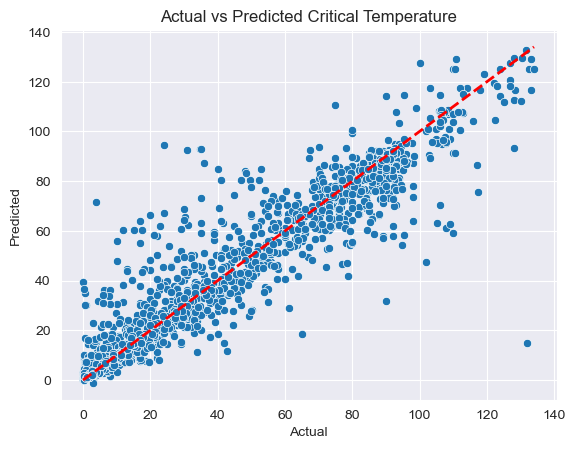

In [27]:
# Step 1: Initialize the XGBoost Regressor model
# using RandomSearchCV Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=20,
                         
                             reg_lambda = 0.5,
                             subsample = 0.3,
                             random_state=42)

# Step 2: Fit the model on the scaled training data
xgb_model.fit(train_X_pca, new_train_y)

# Step 3: Predict on the training set
xgb_train_preds = xgb_model.predict(train_X_pca)

# Training results
print('XGBoost Results')
num_features = train_X_pca.shape[1]
train_metrics = Evaluation_results(new_train_y, xgb_train_preds, objective = 'train', num_features  = num_features)
train_metrics

# Predict on the testing set
xgb_test_preds = xgb_model.predict(test_X_pca)

# Testing results
num_features = train_X_pca.shape[1]
test_metrics = Evaluation_results(y_test, xgb_test_preds, objective = 'test', num_features  = num_features)
test_metrics

# plotting the results
sns.scatterplot(x= y_test, y = xgb_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

### Grid on XGBoost

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


  2%|█▍                                                                       | 1/50 [18:36:15<911:36:47, 66975.66s/it]


Randomized search completed in 66975.67 seconds.
Best hyperparameters: {'subsample': 0.25, 'reg_lambda': 0.5, 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.01}
XGBoost Training Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 4.57699
Training MAE: 2.24693
Training R2 score: 0.98210
Training Adjusted R2 score: 0.98207
None
XGBoost Testing Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 10.24282
Testing MAE: 5.61103
Testing R2 score: 0.91024
Testing Adjusted R2 score: 0.90939
None


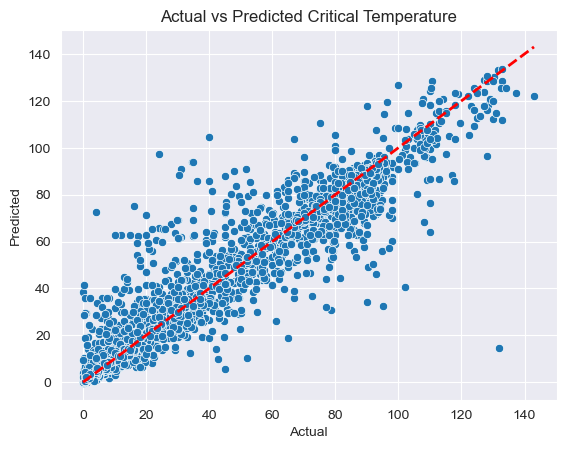

In [20]:
# # Step 1: Initialize the XGBoost Regressor model
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # Step 2: Define the parameter distributions for RandomizedSearchCV
# param_dist = {
#     'n_estimators': [700, 1000, 1200, 1500],
#     'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.25,],
#     'max_depth': [6, 12, 15, 20,],
#     'subsample': [0.25, 0.5, 0.75],
#     'reg_lambda': [0.1, 0.5, 1.0, 1.5],
# }

# # Step 3: Initialize RandomizedSearchCV with tqdm progress bar
# def track_progress(estimator, param_dist, X, y):
#     n_iter_search = 50  # Number of parameter settings that are sampled
#     n_total = min(n_iter_search, np.prod([len(param_dist[key]) for key in param_dist]))
    
#     with tqdm(total=n_total) as pbar:
#         random_search = RandomizedSearchCV(estimator=estimator, param_distributions=param_dist, n_iter=n_iter_search,
#                                            cv=10, scoring='r2', verbose=2, n_jobs=5, random_state=42)
#         random_search.fit(X, y)
#         pbar.update()
#     return random_search  # Return the RandomizedSearchCV object

# # Example of how to use the function
# start_time = time.time()
# random_search = track_progress(xgb_model, param_dist, train_X_pca, new_train_y)
# elapsed_time = time.time() - start_time

# print(f"Randomized search completed in {elapsed_time:.2f} seconds.")

# # Step 4: Get the best hyperparameters and best model
# best_params = random_search.best_params_
# print("Best hyperparameters:", best_params)

# best_model = random_search.best_estimator_

# # Step 5: Predict on the training set
# xgb_train_preds = best_model.predict(train_X_pca)

# # Training results
# print('XGBoost Training Results')
# num_features = train_X_pca.shape[1]
# train_metrics = Evaluation_results(new_train_y, xgb_train_preds, objective='train', num_features=num_features)
# print(train_metrics)

# # Step 6: Predict on the testing set
# xgb_test_preds = best_model.predict(test_X_pca)

# # Testing results
# print('XGBoost Testing Results')
# num_features = test_X_pca.shape[1]
# test_metrics = Evaluation_results(y_test, xgb_test_preds, objective='test', num_features=num_features)
# print(test_metrics)

# # Step 7: Plotting the results
# sns.scatterplot(x=y_test, y=xgb_test_preds)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted Critical Temperature')
# plt.show()


In [29]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']